**Importing inial method just working for some EDA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

np.random.seed(42)

Now mount google drive and load the dataset for analysis

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import pandas as pd
file_path = '/content/drive/My Drive/SM_TECHNOLOGY_DATASET/HEALTH DATASET.csv'
dataset = pd.read_csv(file_path)

Lets start the EDA properly

In [45]:
for column in dataset.columns:
  print(column)

Height (cm)
Weight (kg)
BMI
Medical conditions
Medications in use
Residential Address
Previous gastrointestinal issues
Family history of diseases
Previous surgeries
Previous therapies
Frequency of bowel movements
Stool consistency (Bristol scale)
Presence of bloating
Presence of gas
Presence of abdominal pain
Difficult digestion
Known intolerances
Food allergies
Current diet
Weekly consumption of vegetables (portions)
Weekly consumption of fruits (portions)
Weekly consumption of whole grains (portions)
Weekly consumption of animal proteins (portions)
Weekly consumption of plant proteins (portions)
Weekly consumption of dairy products (portions)
Weekly consumption of fermented foods (portions)
Daily water intake (liters)
Alcohol consumption
Meal times
Physical activity type
Weekly frequency of physical activity (per week)
Average sleep hours (hours)
Stress level (1-10 scale)
Smoking status (Yes/No, quantity)
Recent use of antibiotics
Regular medications
Diagnosed conditions
Abdominal su

In [46]:
dataset.shape

(10000, 54)

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 54 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Height (cm)                                       10000 non-null  int64  
 1   Weight (kg)                                       10000 non-null  int64  
 2   BMI                                               10000 non-null  float64
 3   Medical conditions                                10000 non-null  object 
 4   Medications in use                                10000 non-null  object 
 5   Residential Address                               10000 non-null  object 
 6   Previous gastrointestinal issues                  10000 non-null  bool   
 7   Family history of diseases                        10000 non-null  object 
 8   Previous surgeries                                10000 non-null  object 
 9   Previous therapies

In [48]:
dataset.isnull().sum()

,0
Height (cm),0
Weight (kg),0
BMI,0
Medical conditions,0
Medications in use,0
Residential Address,0
Previous gastrointestinal issues,0
Family history of diseases,0
Previous surgeries,0
Previous therapies,0


Need to remove unwanted column

In [49]:
columns_to_drop = [
'Residential Address', 'Medications in use', 'Previous therapies',
'Known intolerances', 'Food allergies', 'Meal times', 'Other supplements',
'Intestinal health indicators', 'Comparison with optimal values',
'Supplement Plan - Recommended products', 'Supplement Plan - Dosages and timings',
'Supplement Plan - Intake tracking', 'Supplement Plan - Automatic reminders',
'Meal Plan - Recommended/avoided foods', 'Weekly menu', 'Personalized recipes',
'Relevant family history'
]

existing_cols = [col for col in columns_to_drop if col in dataset.columns]
dataset.drop(columns=existing_cols, inplace=True)

Find the multivalued column

In [50]:
def detect_multivalue_columns(dataset, delimiter=","):
   multivalue_cols = []
   for col in dataset.columns:
        if dataset[col].dtype == 'object':
            if dataset[col].dropna().astype(str).str.contains(delimiter).any():
                multivalue_cols.append(col)

   return multivalue_cols
multivalue_columns = detect_multivalue_columns(dataset)
print("Columns with multiple values per row:", multivalue_columns)

Columns with multiple values per row: ['Medical conditions', 'Family history of diseases', 'Smoking status (Yes/No, quantity)', 'Diagnosed conditions']


Listing up all the column into categorical, numerical, binary and the target class

In [51]:
target = 'Current status of microbiota'
numerical_cols = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
binary_cols = dataset.select_dtypes(include=['bool']).columns.tolist()
categorical_cols = dataset.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in multivalue_columns + [target]]
features = numerical_cols + binary_cols + categorical_cols


print("Target Column:", target)
print("Numerical Columns:", numerical_cols)
print("Binary Columns:", binary_cols)
print("Categorical Columns:", categorical_cols)
print("Multi-Value Columns:", multivalue_columns)
print("All Feature Columns:", features)


Target Column: Current status of microbiota
Numerical Columns: ['Height (cm)', 'Weight (kg)', 'BMI', 'Frequency of bowel movements', 'Stool consistency (Bristol scale)', 'Weekly consumption of vegetables (portions)', 'Weekly consumption of fruits (portions)', 'Weekly consumption of whole grains (portions)', 'Weekly consumption of animal proteins (portions)', 'Weekly consumption of plant proteins (portions)', 'Weekly consumption of dairy products (portions)', 'Weekly consumption of fermented foods (portions)', 'Daily water intake (liters)', 'Weekly frequency of physical activity (per week)', 'Average sleep hours (hours)', 'Stress level (1-10 scale)']
Binary Columns: ['Previous gastrointestinal issues', 'Presence of bloating', 'Presence of gas', 'Presence of abdominal pain', 'Difficult digestion', 'Alcohol consumption', 'Recent use of antibiotics', 'Probiotics', 'Prebiotics', 'Vitamins', 'Minerals']
Categorical Columns: ['Previous surgeries', 'Current diet', 'Physical activity type', 'Re

In [52]:
unique_values = {}
for col in multivalue_columns:
    values = set()
    for entry in dataset[col].str.split(','):
        for value in entry:
            values.add(value.strip())
    unique_values[col] = list(values)
    for value in unique_values[col]:
        dataset[f"{col}_{value}"] = dataset[col].apply(
            lambda x: 1 if value in [v.strip() for v in x.split(',')] else 0
        )
        features.append(f"{col}_{value}")
        binary_cols.append(f"{col}_{value}")
    dataset= dataset.drop(columns=[col])
    if col in features:
        features.remove(col)
    if col in categorical_cols:
        categorical_cols.remove(col)

In [53]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
os.makedirs('eda_plots', exist_ok=True)

def save_plot(fig, filename):
    fig.savefig(f'eda_plots/{filename}', bbox_inches='tight')
    plt.close(fig)
def plot_target_distribution(data, target):
    fig, ax = plt.subplots()
    sns.countplot(x=target, data=data, ax=ax)
    ax.set_title('Microbiota Status Distribution')
    save_plot(fig, 'target_distribution.png')
def plot_correlation_matrix(data, numerical_cols):
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(data[numerical_cols].corr(), cmap='coolwarm', annot=True, fmt=".2f", ax=ax)
    ax.set_title('Correlation Matrix')
    save_plot(fig, 'correlation_matrix.png')
def plot_outliers(data, numerical_cols):
    fig, ax = plt.subplots(figsize=(12, 6))
    data[numerical_cols].boxplot(ax=ax)
    ax.set_title('Outliers in Numerical Features')
    plt.xticks(rotation=45)
    save_plot(fig, 'outliers.png')

plot_target_distribution(dataset, target)
plot_correlation_matrix(dataset, numerical_cols)
plot_outliers(dataset, numerical_cols)


See the level of 3 classes

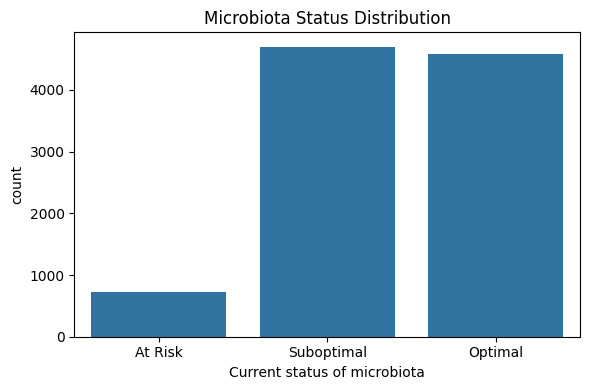

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs('eda_plots', exist_ok=True)
plt.figure(figsize=(6, 4))
sns.countplot(x=target, data=dataset)
plt.title('Microbiota Status Distribution')
plt.tight_layout()
plt.savefig('eda_plots/target.png')
plt.show()

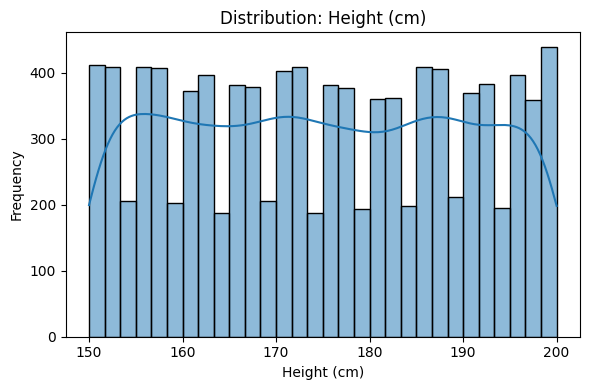

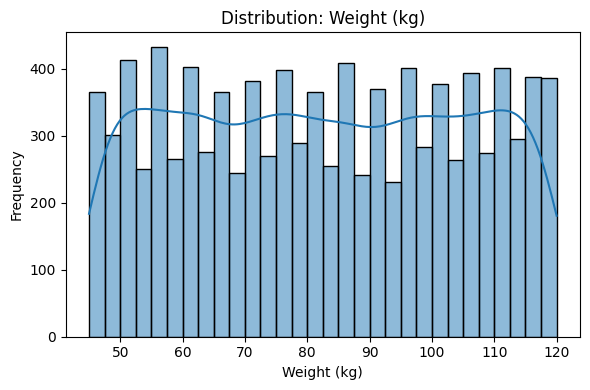

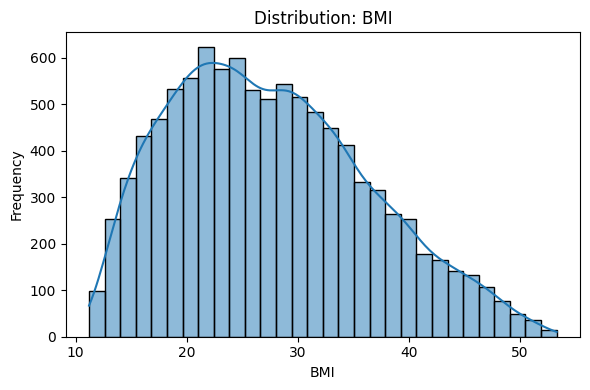

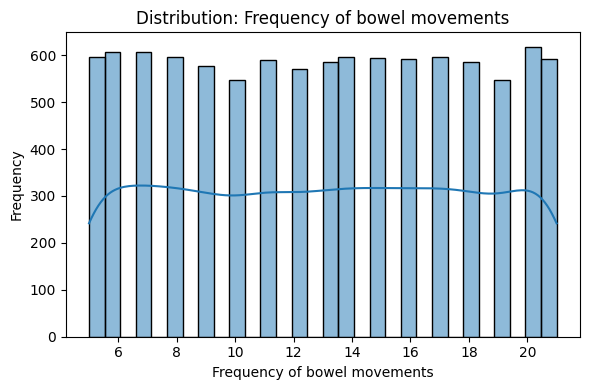

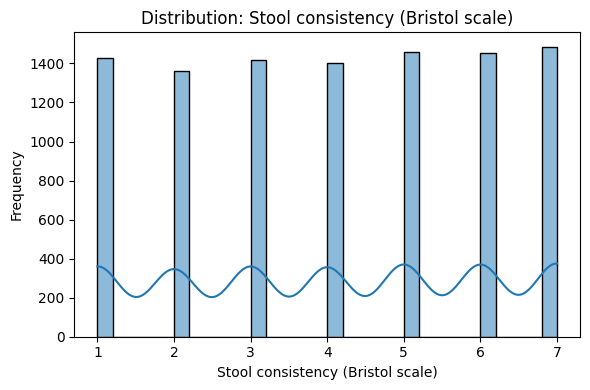

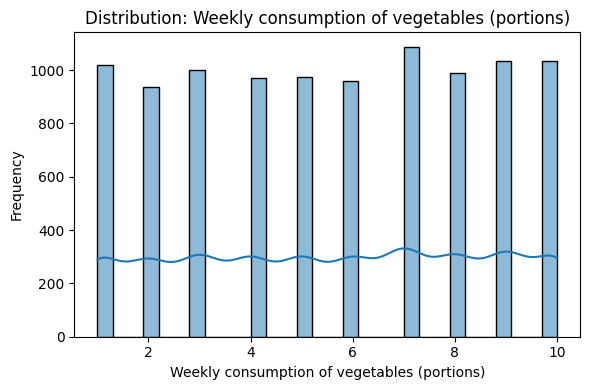

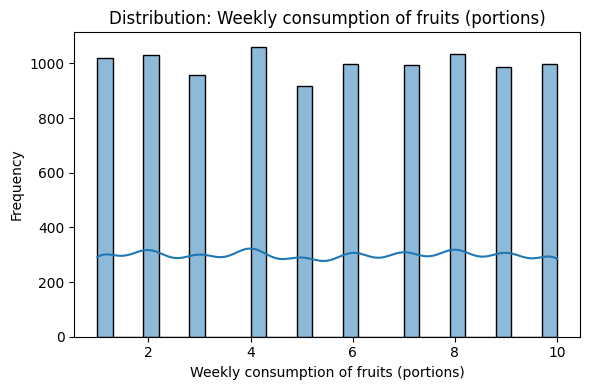

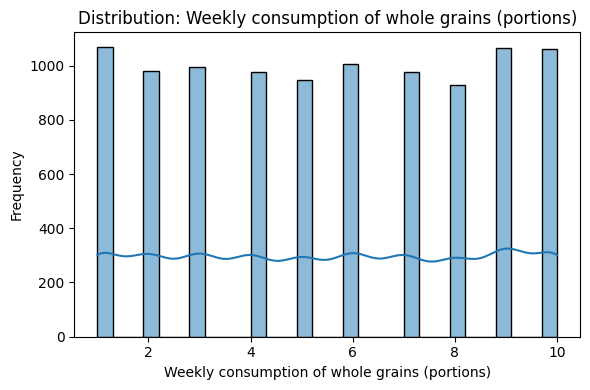

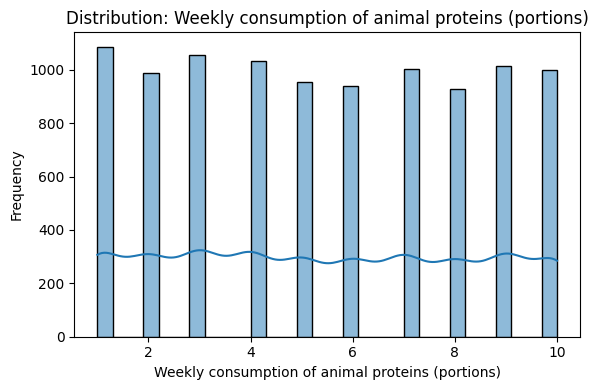

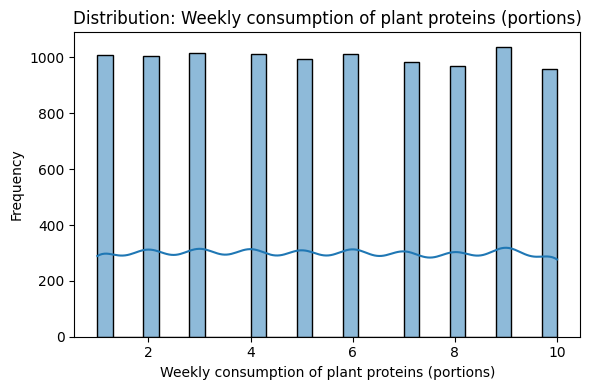

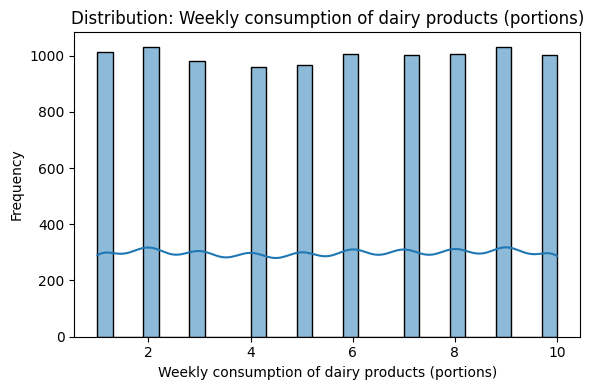

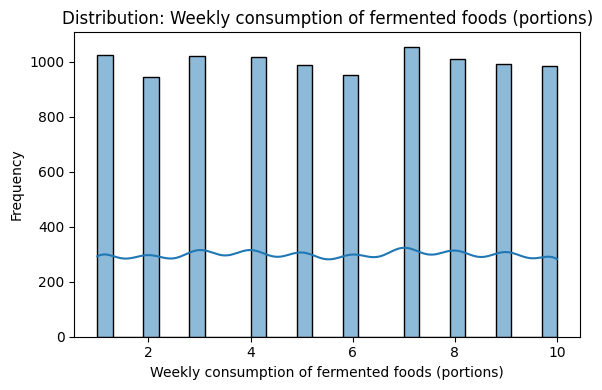

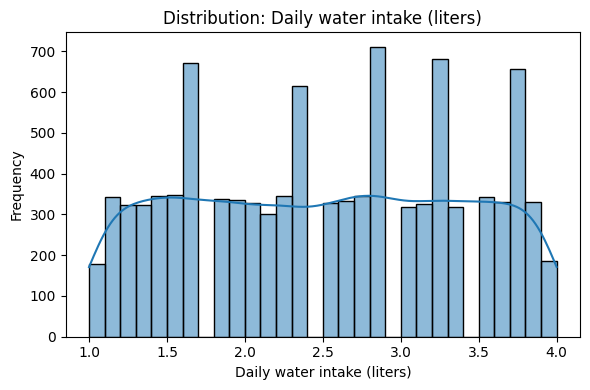

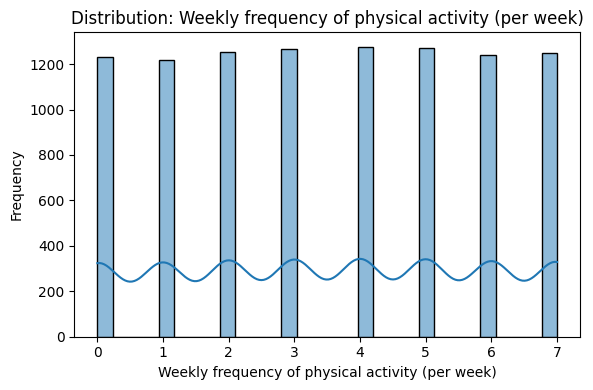

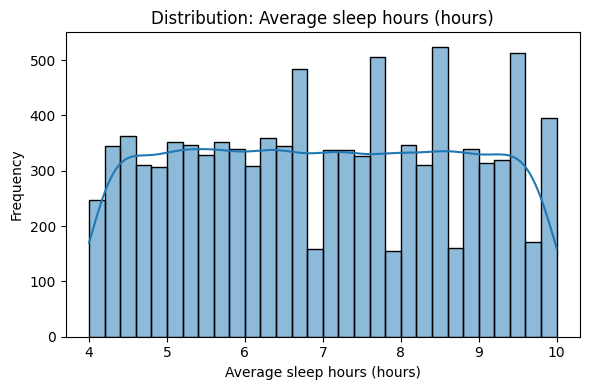

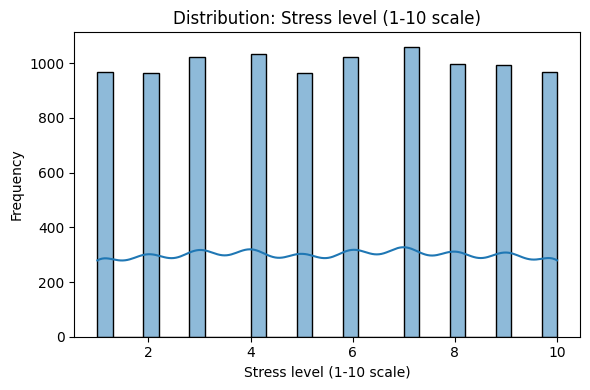

In [55]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(dataset[col], kde=True, bins=30)
    plt.title(f'Distribution: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(f'eda_plots/hist_{col}.png')
    plt.show()

In [56]:
dataset['Plant_to_Animal_Protein_Ratio'] = dataset['Weekly consumption of plant proteins (portions)'] / \
    (dataset['Weekly consumption of animal proteins (portions)'] + 1e-5)

dataset['Stress_Category'] = pd.cut(
    dataset['Stress level (1-10 scale)'],
    bins=[0, 3, 7, 10],
    labels=['Low', 'Medium', 'High']
)

In [57]:
numerical_cols.append('Plant_to_Animal_Protein_Ratio')
categorical_cols.append('Stress_Category')
features.append('Plant_to_Animal_Protein_Ratio')
features.append('Stress_Category')

In [58]:
dataset.head(5)

,Height (cm),Weight (kg),BMI,Previous gastrointestinal issues,Previous surgeries,Frequency of bowel movements,Stool consistency (Bristol scale),Presence of bloating,Presence of gas,Presence of abdominal pain,...,"Smoking status (Yes/No, quantity)_20","Smoking status (Yes/No, quantity)_4",Diagnosed conditions_Hypertension,Diagnosed conditions_Asthma,Diagnosed conditions_Hyperthyroidism,Diagnosed conditions_Diabetes,Diagnosed conditions_Obesity,Diagnosed conditions_Anemia,Plant_to_Animal_Protein_Ratio,Stress_Category
0,173,120,40.1,True,Appendectomy,6,2,False,True,False,...,0,0,1,0,0,1,0,0,0.999995,Medium
1,183,110,32.8,False,Knee surgery,18,6,True,True,True,...,0,0,0,1,0,0,1,0,1.666661,Medium
2,160,111,43.4,False,Knee surgery,6,6,False,True,False,...,0,0,1,0,1,0,0,0,1.111110,High
3,177,75,23.9,True,Knee surgery,16,7,True,False,True,...,0,0,0,0,1,1,0,0,4.499978,Medium
4,170,97,33.6,True,Appendectomy,17,4,True,False,False,...,0,0,0,0,0,1,1,0,2.999970,High


Encoding the categorical value, replace into the numerical

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le = LabelEncoder()

In [61]:
le_dict = {}
for col in categorical_cols + [target]:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    le_dict[col] = le
for col in binary_cols:
    dataset[col] = dataset[col].astype(int)

In [62]:
dataset

,Height (cm),Weight (kg),BMI,Previous gastrointestinal issues,Previous surgeries,Frequency of bowel movements,Stool consistency (Bristol scale),Presence of bloating,Presence of gas,Presence of abdominal pain,...,"Smoking status (Yes/No, quantity)_20","Smoking status (Yes/No, quantity)_4",Diagnosed conditions_Hypertension,Diagnosed conditions_Asthma,Diagnosed conditions_Hyperthyroidism,Diagnosed conditions_Diabetes,Diagnosed conditions_Obesity,Diagnosed conditions_Anemia,Plant_to_Animal_Protein_Ratio,Stress_Category
0,173,120,40.1,1,0,6,2,0,1,0,...,0,0,1,0,0,1,0,0,0.999995,2
1,183,110,32.8,0,2,18,6,1,1,1,...,0,0,0,1,0,0,1,0,1.666661,2
2,160,111,43.4,0,2,6,6,0,1,0,...,0,0,1,0,1,0,0,0,1.111110,0
3,177,75,23.9,1,2,16,7,1,0,1,...,0,0,0,0,1,1,0,0,4.499978,2
4,170,97,33.6,1,0,17,4,1,0,0,...,0,0,0,0,0,1,1,0,2.999970,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,187,107,30.6,1,2,15,6,1,1,1,...,0,0,0,0,0,0,1,1,2.999990,2
9996,172,67,22.6,0,1,19,6,0,1,1,...,0,0,0,0,0,0,1,1,4.999975,1
9997,162,89,33.9,1,2,13,4,1,0,0,...,0,0,0,1,0,0,0,1,1.124999,2
9998,153,105,44.9,0,1,9,2,0,1,1,...,0,0,0,0,1,0,1,0,6.999930,1


Here, doing standardization. all the value between -1 to 1

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])

In [65]:
dataset

,Height (cm),Weight (kg),BMI,Previous gastrointestinal issues,Previous surgeries,Frequency of bowel movements,Stool consistency (Bristol scale),Presence of bloating,Presence of gas,Presence of abdominal pain,...,"Smoking status (Yes/No, quantity)_20","Smoking status (Yes/No, quantity)_4",Diagnosed conditions_Hypertension,Diagnosed conditions_Asthma,Diagnosed conditions_Hyperthyroidism,Diagnosed conditions_Diabetes,Diagnosed conditions_Obesity,Diagnosed conditions_Anemia,Plant_to_Animal_Protein_Ratio,Stress_Category
0,-0.126180,1.703746,1.413641,1,0,-1.420041,-1.015742,0,1,0,...,0,0,1,0,0,1,0,0,-0.345055,2
1,0.547393,1.250452,0.591163,0,2,1.018321,0.976104,1,1,1,...,0,0,0,1,0,0,1,0,0.003604,2
2,-1.001826,1.295781,1.785446,0,2,-1.420041,0.976104,0,1,0,...,0,0,1,0,1,0,0,0,-0.286943,0
3,0.143249,-0.336077,-0.411585,1,2,0.611927,1.474066,1,0,1,...,0,0,0,0,1,1,0,0,1.485394,2
4,-0.328253,0.661170,0.681297,1,0,0.815124,-0.019819,1,0,0,...,0,0,0,0,0,1,1,0,0.700908,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.816822,1.114464,0.343292,1,2,0.408730,0.976104,1,1,1,...,0,0,0,0,0,0,1,1,0.700919,2
9996,-0.193538,-0.698712,-0.558054,0,1,1.221517,0.976104,0,1,1,...,0,0,0,0,0,0,1,1,1.746887,1
9997,-0.867111,0.298535,0.715098,1,2,0.002337,-0.019819,1,0,0,...,0,0,0,1,0,0,0,1,-0.279679,2
9998,-1.473327,1.023805,1.954449,0,1,-0.810450,-1.015742,0,1,1,...,0,0,0,0,1,0,1,0,2.792839,1


Now, the important things: need to check the imbalance dataset and resolved it

In [66]:
from collections import Counter
from imblearn.over_sampling import SMOTE

Normally checking the imbalance

Before SMOTE: Counter({2: 4698, 1: 4580, 0: 722})


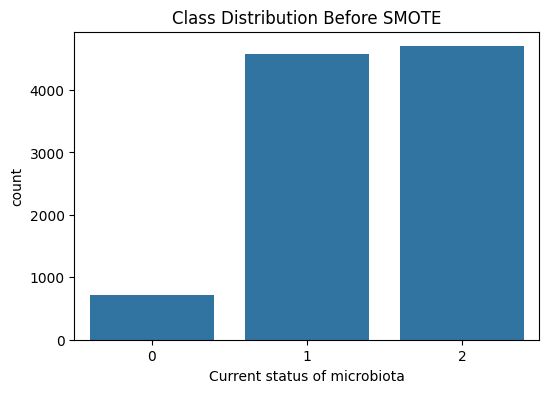

In [67]:
x = dataset[features]
y = dataset[target]
print("Before SMOTE:", Counter(y))
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title("Class Distribution Before SMOTE")
plt.show()

In [68]:
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x, y)

After resolve the imbalance

After SMOTE: Counter({0: 4698, 2: 4698, 1: 4698})


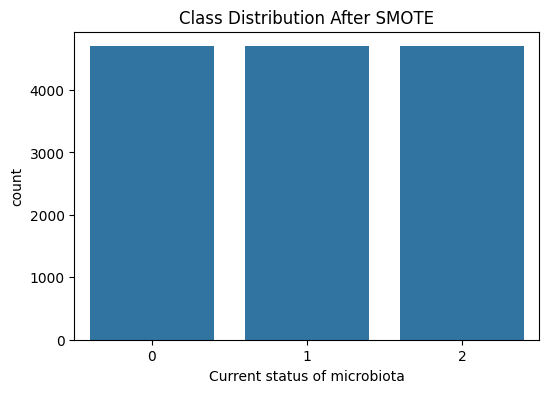

In [69]:
print("After SMOTE:", Counter(y_res))
plt.figure(figsize=(6, 4))
sns.countplot(x=y_res)
plt.title("Class Distribution After SMOTE")
plt.show()

Spliting the data

In [71]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_res, y_res, test_size=0.2, random_state=42)

**Using Baseline models**

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

In [75]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

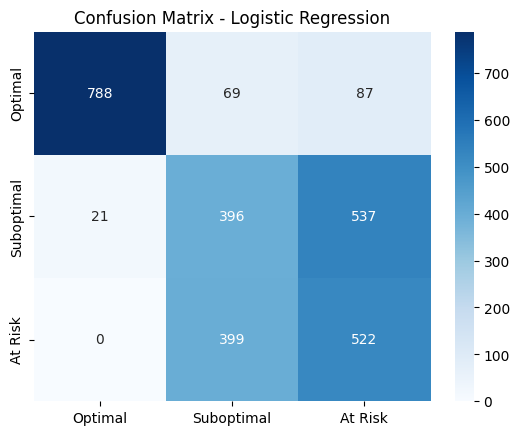

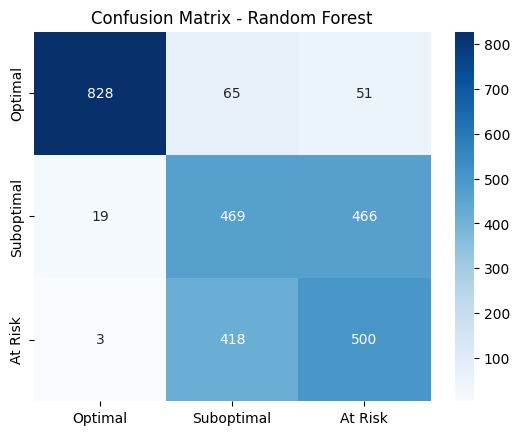

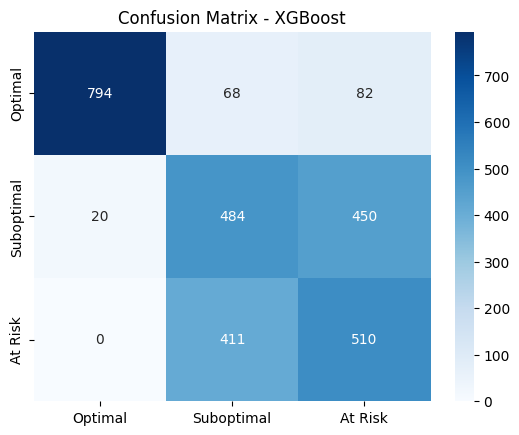

In [77]:
results = []

for name, model in models.items():
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    acc = accuracy_score(ytest, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(ytest, y_pred, average='weighted')
    results.append([name, acc, prec, rec, f1])
    cm = confusion_matrix(ytest, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Optimal', 'Suboptimal', 'At Risk'],
                yticklabels=['Optimal', 'Suboptimal', 'At Risk'])
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

From here, lets jump into the Transformer based model

In [95]:
pip install pytorch-tabnet

In [96]:
from pytorch_tabnet.tab_model import TabNetClassifier
X_train_np = xtrain.values
X_test_np = xtest.values
y_train_np = ytrain.values
y_test_np = ytest.values

In [97]:
tabnet_model = TabNetClassifier(
    n_d=64, n_a=64, n_steps=5,
    gamma=1.5, n_independent=2, n_shared=2,
    seed=42, verbose=1
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


In [98]:
tabnet_model.fit(
    X_train=X_train_np, y_train=y_train_np,
    eval_set=[(X_test_np, y_test_np)],
    eval_name=["test"],
    eval_metric=["accuracy"],
    max_epochs=20,
    patience=5,
    batch_size=256,
    virtual_batch_size=128,
    num_workers=0
)

epoch 0  | loss: 1.38966 | test_accuracy: 0.42675 |  0:00:03s
epoch 1  | loss: 1.08166 | test_accuracy: 0.41575 |  0:00:06s
epoch 2  | loss: 0.98945 | test_accuracy: 0.45903 |  0:00:08s
epoch 3  | loss: 0.86323 | test_accuracy: 0.54416 |  0:00:10s
epoch 4  | loss: 0.75731 | test_accuracy: 0.58389 |  0:00:11s
epoch 5  | loss: 0.70723 | test_accuracy: 0.59454 |  0:00:13s
epoch 6  | loss: 0.70095 | test_accuracy: 0.61334 |  0:00:15s
epoch 7  | loss: 0.69408 | test_accuracy: 0.60411 |  0:00:18s
epoch 8  | loss: 0.69356 | test_accuracy: 0.61334 |  0:00:20s
epoch 9  | loss: 0.68428 | test_accuracy: 0.61405 |  0:00:22s
epoch 10 | loss: 0.68577 | test_accuracy: 0.59986 |  0:00:24s
epoch 11 | loss: 0.68705 | test_accuracy: 0.61015 |  0:00:26s
epoch 12 | loss: 0.68335 | test_accuracy: 0.60447 |  0:00:27s
epoch 13 | loss: 0.68211 | test_accuracy: 0.61192 |  0:00:30s
epoch 14 | loss: 0.67695 | test_accuracy: 0.60695 |  0:00:32s

Early stopping occurred at epoch 14 with best_epoch = 9 and best_test

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [99]:
y_pred = tabnet_model.predict(X_test_np)
acc = accuracy_score(y_test_np, y_pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_test_np, y_pred, average='weighted')
results.append(['TabNet', acc, prec, rec, f1])

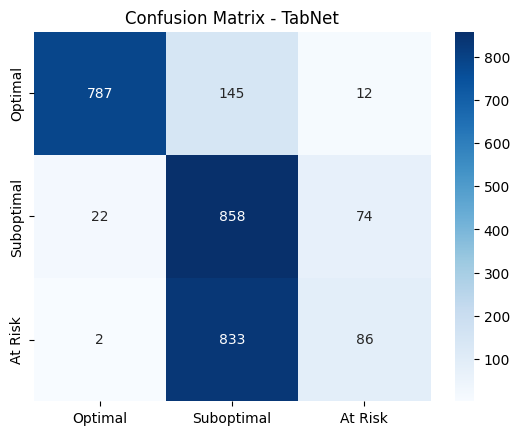

In [100]:
cm = confusion_matrix(y_test_np, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Optimal', 'Suboptimal', 'At Risk'],
            yticklabels=['Optimal', 'Suboptimal', 'At Risk'])
plt.title('Confusion Matrix - TabNet')
plt.savefig('cm_tabnet.png')
plt.show()

In [101]:
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
print("\nModel Comparison:\n", results_df)
results_df.to_csv('model_comparison.csv')


Model Comparison:
                  Model  Accuracy  Precision    Recall        F1
0  Logistic Regression  0.605179   0.630102  0.605179  0.613504
1        Random Forest  0.637460   0.653549  0.637460  0.644239
2              XGBoost  0.634267   0.656637  0.634267  0.643138
3               TabNet  0.614048   0.646466  0.614048  0.559892


I took 10 key feature and then predict based on the transformer based model

In [104]:
import random
key_features = {
    'BMI': 25,
    'Stool consistency (Bristol scale)': 4,
    'Frequency of bowel movements': 4,
    'Weekly consumption of vegetables (portions)': 10,
    'Weekly consumption of fermented foods (portions)': 5,
    'Daily water intake (liters)': 2,
    'Physical activity type': 'Cardio',
    'Average sleep hours (hours)': 7,
    'Stress level (1-10 scale)': 5,
    'Current diet': 'Balanced'
}


In [107]:
while True:
    print("\nEnter key patient data (leave blank for default):")
    input_data = {}
    for col, default_val in key_features.items():
        val = input(f"{col} (e.g., {default_val}): ").strip()
        if val:
            input_data[col] = float(val) if col in numerical_cols else val
        else:
            input_data[col] = default_val
    for col in features:
        if col in input_data:
            continue
        elif col in numerical_cols:
            input_data[col] = 0
        elif col in binary_cols:
            input_data[col] = 0
        elif col in categorical_cols:
            input_data[col] = le_dict[col].classes_[0]
        elif any(col.startswith(m) for m in multivalue_columns):
            input_data[col] = 0
        else:
            input_data[col] = 0
    input_data['Plant_to_Animal_Protein_Ratio'] = (
        input_data.get('Weekly consumption of plant proteins (portions)', 0) /
        (input_data.get('Weekly consumption of animal proteins (portions)', 0) + 1e-5)
    )
    input_data['Stress_Category'] = pd.cut(
        [input_data['Stress level (1-10 scale)']],
        bins=[0, 3, 7, 10],
        labels=['Low', 'Medium', 'High']
    )[0]
    input_df = pd.DataFrame([input_data])
    try:
        input_df['Stress_Category'] = le_dict['Stress_Category'].transform(
            input_df['Stress_Category'].astype(str).str.strip().str.capitalize()
        )
    except ValueError:
        input_df['Stress_Category'] = le_dict['Stress_Category'].transform([le_dict['Stress_Category'].classes_[0]])
    for col in categorical_cols:
        if col in input_df and col in le_dict:
            try:
                input_df[col] = le_dict[col].transform(
                    input_df[col].astype(str).str.strip().str.capitalize()
                )
            except ValueError:
                input_df[col] = le_dict[col].transform([le_dict[col].classes_[0]])
    for col in binary_cols:
        if col in input_df.columns:
            input_df[col] = input_df[col].astype(int)
    input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])
    input_pred = tabnet_model.predict(input_df[features].values)[0]
    status = le_dict[target].inverse_transform([input_pred])[0]
    print(f"\nPredicted Microbiota Status: {status}")
    if input("\nPredict another? (yes/no): ").strip().lower() != 'yes':
        break



📝 Enter key patient data (leave blank for default):
BMI (e.g., 25): 12
Stool consistency (Bristol scale) (e.g., 4): 1
Frequency of bowel movements (e.g., 4): 2
Weekly consumption of vegetables (portions) (e.g., 10): 12
Weekly consumption of fermented foods (portions) (e.g., 5): 2
Daily water intake (liters) (e.g., 2): 2
Physical activity type (e.g., Cardio): Cardio
Average sleep hours (hours) (e.g., 7): 3
Stress level (1-10 scale) (e.g., 5): 4
Current diet (e.g., Balanced): Balanced

✅ Predicted Microbiota Status: At Risk

🔁 Predict another? (yes/no): no
